In [89]:
import pandas as pd
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_fscore_support
from sklearn.metrics import accuracy_score

%matplotlib inline

In [90]:
data=pd.read_csv("data_final.csv" )

In [91]:
data.shape

(734, 29)

In [92]:
data.molecule_class.value_counts()

active      370
inactive    364
Name: molecule_class, dtype: int64

In [93]:
data.isnull().sum().sum()

0

In [94]:
data.shape

(734, 29)

In [95]:
data.head()

,Molecule_ChEMBL_ID,Standard_Value,Smiles_x,molecule_class,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Structure Type,Inorganic Flag,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles_y
0,CHEMBL240055,0.30,O=C(OC1([C@H]2CCC[C@@H](c3cc(F)cc(F)c3)N2S(=O)...,active,0.0,622.18,2.0,2.0,6.52,70.16,...,MOL,-1.0,42.0,7.0,0.0,2.0,621.2240,BASE,C31H38ClF2N3O4S,O=C(OC1([C@H]2CCC[C@@H](c3cc(F)cc(F)c3)N2S(=O)...
1,CHEMBL1091513,0.65,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,0.0,517.93,443.0,525.0,4.67,80.31,...,MOL,-1.0,32.0,5.0,1.0,1.0,517.0208,ACID,C19H17ClF5NO4S2,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...
2,CHEMBL4110988,0.70,CO[C@H]1CC[C@]2(CC1)Cc1ccc(C#CC(C)C)cc1[C@]21N...,active,0.0,363.51,2.0,2.0,3.81,59.97,...,MOL,-1.0,27.0,4.0,2.0,0.0,363.2311,NEUTRAL,C23H29N3O,CO[C@H]1CC[C@]2(CC1)Cc1ccc(C#CC(C)C)cc1[C@]21N...
3,CHEMBL3898248,0.70,CO[C@H]1CC[C@]2(CC1)Cc1ccc(OCCC(F)(F)F)cc1[C@@...,active,0.0,409.45,2.0,2.0,4.13,69.20,...,MOL,-1.0,29.0,5.0,2.0,0.0,409.1977,NEUTRAL,C21H26F3N3O2,CO[C@H]1CC[C@]2(CC1)Cc1ccc(OCCC(F)(F)F)cc1[C@@...
4,CHEMBL3939963,0.80,CO[C@H]1CC[C@]2(CC1)Cc1ccc(OCCC3CC3)cc1C21N=C(...,active,0.0,381.52,2.0,2.0,3.98,69.20,...,MOL,-1.0,28.0,5.0,2.0,0.0,381.2416,NEUTRAL,C23H31N3O2,CO[C@H]1CC[C@]2(CC1)Cc1ccc(OCCC3CC3)cc1C21N=C(...


X_test_in_app = data[['Molecule_ChEMBL_ID', 'Molecular Weight', 'Targets',
       'Bioactivities', 'AlogP', 'Polar Surface Area', 'HBA',
       '#Rotatable Bonds','CX LogP', 'CX LogD','Heavy Atoms',
       'HBA (Lipinski)','HBD (Lipinski)', 
       'Molecular Weight (Monoisotopic)']]

In [7]:
X = data[['Max Phase', 'Molecular Weight', 'Targets',
       'Bioactivities', 'AlogP', 'Polar Surface Area', 'HBA', 'HBD',
       '#RO5 Violations', '#Rotatable Bonds', 'QED Weighted',
       'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)']]

In [8]:
X.shape

(734, 20)

<h1>feature selection</h1>

In [9]:
def remove_low_variance(input_data, threshold=2):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=2)
X.columns

Index(['Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', '#Rotatable Bonds', 'CX LogP', 'CX LogD',
       'Heavy Atoms', 'HBA (Lipinski)', 'HBD (Lipinski)',
       'Molecular Weight (Monoisotopic)'],
      dtype='object')

In [10]:
X.var(axis=0)

Molecular Weight                    16279.839654
Targets                              4966.114949
Bioactivities                      149254.408097
AlogP                                   2.902275
Polar Surface Area                   1124.201924
HBA                                     4.505186
#Rotatable Bonds                       11.372786
CX LogP                                 3.230869
CX LogD                                 4.467266
Heavy Atoms                            75.619259
HBA (Lipinski)                          4.909704
HBD (Lipinski)                          2.078222
Molecular Weight (Monoisotopic)     15897.643884
dtype: float64

In [11]:
X.shape

(734, 13)

In [12]:
y=data['molecule_class']
y

0        active
1        active
2        active
3        active
4        active
         ...   
729    inactive
730    inactive
731    inactive
732    inactive
733    inactive
Name: molecule_class, Length: 734, dtype: object

In [13]:
y.shape

(734,)

<h1>train test split</h1>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
X_train.shape

(587, 13)

In [16]:
X_test.shape

(147, 13)

In [17]:
y_train.head(20)

176      active
329      active
386    inactive
142      active
438    inactive
161      active
333      active
564    inactive
467    inactive
550    inactive
22       active
298      active
592    inactive
153      active
378    inactive
194      active
505    inactive
188      active
264      active
681    inactive
Name: molecule_class, dtype: object

In [18]:
y_train.value_counts()

active      297
inactive    290
Name: molecule_class, dtype: int64

In [19]:
y_test.value_counts()

inactive    74
active      73
Name: molecule_class, dtype: int64

In [20]:
#X_test.to_csv("test.csv" ,index=False)

<h1>1 - naive_bayes</h1>

<h3>1.1 - ComplementNB</h3>

In [21]:
xx_train=X_train.drop(['AlogP','CX LogP','CX LogD'],axis='columns')
xx_test=X_test.drop(['AlogP','CX LogP','CX LogD'],axis='columns')

In [22]:
from sklearn.naive_bayes import ComplementNB
com_nb_model = ComplementNB()
com_nb_model.fit(xx_train,y_train)

ComplementNB()

In [23]:
ComplementNB_acc=com_nb_model.score(xx_test,y_test)
ComplementNB_acc

0.54421768707483

In [24]:
predict_com_nb=com_nb_model.predict(xx_test)
print(classification_report(y_test,predict_com_nb))
ComplementNB_cm=confusion_matrix(y_test,predict_com_nb)
ComplementNB_cm

              precision    recall  f1-score   support

      active       0.52      0.97      0.68        73
    inactive       0.82      0.12      0.21        74

    accuracy                           0.54       147
   macro avg       0.67      0.55      0.45       147
weighted avg       0.67      0.54      0.44       147



array([[71,  2],
       [65,  9]], dtype=int64)

In [25]:
ComplementNB_array = precision_recall_fscore_support(y_test,predict_com_nb,average='macro')
ComplementNB_array

(0.670120320855615, 0.5471121806738245, 0.4455952716014636, None)

<h3>1.2 - MultinomialNB</h3>

In [26]:
from sklearn.naive_bayes import MultinomialNB
mul_nb_model = MultinomialNB()
mul_nb_model.fit(xx_train,y_train)

MultinomialNB()

In [27]:
MultinomialNB_acc=mul_nb_model.score(xx_test,y_test)
MultinomialNB_acc

0.54421768707483

In [28]:
predict_mul_nb=mul_nb_model.predict(xx_test)
print(classification_report(y_test,predict_mul_nb))
MultinomialNB_cm=confusion_matrix(y_test,predict_mul_nb)
MultinomialNB_cm

              precision    recall  f1-score   support

      active       0.52      0.97      0.68        73
    inactive       0.82      0.12      0.21        74

    accuracy                           0.54       147
   macro avg       0.67      0.55      0.45       147
weighted avg       0.67      0.54      0.44       147



array([[71,  2],
       [65,  9]], dtype=int64)

In [29]:
MultinomialNB_array = precision_recall_fscore_support(y_test,predict_mul_nb,average='macro')
MultinomialNB_array

(0.670120320855615, 0.5471121806738245, 0.4455952716014636, None)

<h3> 1.3 - BernoulliNB</h3>

In [30]:
from sklearn.naive_bayes import BernoulliNB
model_Bernoulli = BernoulliNB()
model_Bernoulli.fit(X_train, y_train)
#evaluation du modèle
BernoulliNB_acc=model_Bernoulli.score(X_test,y_test)
BernoulliNB_acc

0.564625850340136

In [31]:
predict_ber_nb=model_Bernoulli.predict(X_test)
print(classification_report(y_test,predict_ber_nb))
BernoulliNB_cm=confusion_matrix(y_test,predict_ber_nb)
BernoulliNB_cm

              precision    recall  f1-score   support

      active       0.53      0.99      0.69        73
    inactive       0.92      0.15      0.26        74

    accuracy                           0.56       147
   macro avg       0.72      0.57      0.47       147
weighted avg       0.73      0.56      0.47       147



array([[72,  1],
       [63, 11]], dtype=int64)

In [32]:
BernoulliNB_array = precision_recall_fscore_support(y_test,predict_ber_nb,average='macro')
BernoulliNB_array

(0.725, 0.5674750092558312, 0.4740608228980322, None)

<h3> 1.4 - GaussianNB</h3>

In [33]:
from sklearn.naive_bayes import GaussianNB
model_gau_nb = GaussianNB(var_smoothing=0)
model_gau_nb.fit(X_train,y_train)
GaussianNB_acc=model_gau_nb.score(X_test,y_test)
GaussianNB_acc

0.6326530612244898

In [34]:
predict_gau_nb=model_gau_nb.predict(X_test)
print(classification_report(y_test,predict_gau_nb))
GaussianNB_cm=confusion_matrix(y_test,predict_gau_nb)
GaussianNB_acc

              precision    recall  f1-score   support

      active       0.60      0.79      0.68        73
    inactive       0.70      0.47      0.56        74

    accuracy                           0.63       147
   macro avg       0.65      0.63      0.62       147
weighted avg       0.65      0.63      0.62       147



0.6326530612244898

In [35]:
GaussianNB_array = precision_recall_fscore_support(y_test,predict_gau_nb,average='macro')
GaussianNB_array

(0.6489690721649484, 0.6337467604590892, 0.6234345351043643, None)

<h3>1.5 - CategoricalNB</h3>

In [36]:
from sklearn.naive_bayes import CategoricalNB
model_cat_nb = CategoricalNB()
model_cat_nb.fit(xx_train,y_train)


CategoricalNB()

In [37]:
CategoricalNB_acc=model_cat_nb.score(xx_test,y_test)
CategoricalNB_acc

0.8231292517006803

In [38]:
predict_cat_nb = model_cat_nb.predict(xx_test)
print(classification_report(y_test,predict_cat_nb))
CategoricalNB_cm = confusion_matrix(y_test,predict_cat_nb)
CategoricalNB_cm

              precision    recall  f1-score   support

      active       0.79      0.88      0.83        73
    inactive       0.86      0.77      0.81        74

    accuracy                           0.82       147
   macro avg       0.83      0.82      0.82       147
weighted avg       0.83      0.82      0.82       147



array([[64,  9],
       [17, 57]], dtype=int64)

In [39]:
CategoricalNB_array = precision_recall_fscore_support(y_test,predict_cat_nb,average='macro')
CategoricalNB_array

(0.8268799102132436, 0.8234912995186967, 0.8227272727272728, None)

<h1>2 - Logistic Regression</h1>

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model=LogisticRegression(max_iter=10000,C=0.09)
log_model.fit(X_train,y_train)

LogisticRegression(C=0.09, max_iter=10000)

In [42]:
LogisticRegression_acc=log_model.score(X_test,y_test)
LogisticRegression_acc

0.7551020408163265

In [43]:
predictions_log=log_model.predict(X_test)

In [44]:
print(classification_report(y_test,predictions_log))
LogisticRegression_cm=confusion_matrix(y_test,predictions_log)
LogisticRegression_cm

              precision    recall  f1-score   support

      active       0.78      0.70      0.74        73
    inactive       0.73      0.81      0.77        74

    accuracy                           0.76       147
   macro avg       0.76      0.75      0.75       147
weighted avg       0.76      0.76      0.75       147



array([[51, 22],
       [14, 60]], dtype=int64)

In [45]:
LogisticRegression_array = precision_recall_fscore_support(y_test,predictions_log,average='macro')
LogisticRegression_array

(0.7581613508442777, 0.7547204738985561, 0.754180602006689, None)

<h1>3 - KNN</h1>

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
Ks=100
mean_acc=np.zeros((Ks-1))

#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
    
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7755102040816326 with k= 1


In [48]:

df_acc_knn = pd.DataFrame(data=mean_acc)
df_acc_knn

,0
0,0.775510
1,0.687075
2,0.721088
3,0.727891
4,0.727891
...,...
94,0.612245
95,0.605442
96,0.598639
97,0.598639


In [49]:
mean_acc


array([0.7755102 , 0.68707483, 0.72108844, 0.72789116, 0.72789116,
       0.70748299, 0.70748299, 0.70068027, 0.70068027, 0.69387755,
       0.70068027, 0.67346939, 0.65986395, 0.6462585 , 0.67346939,
       0.66666667, 0.67346939, 0.65986395, 0.66666667, 0.65986395,
       0.66666667, 0.65986395, 0.63945578, 0.65306122, 0.65986395,
       0.65986395, 0.6462585 , 0.65306122, 0.65306122, 0.65306122,
       0.63945578, 0.6462585 , 0.6462585 , 0.6462585 , 0.63265306,
       0.62585034, 0.63265306, 0.65306122, 0.63945578, 0.62585034,
       0.62585034, 0.63265306, 0.62585034, 0.63265306, 0.63265306,
       0.6462585 , 0.63945578, 0.63265306, 0.61904762, 0.62585034,
       0.63265306, 0.61904762, 0.61904762, 0.63945578, 0.63945578,
       0.63265306, 0.63945578, 0.63945578, 0.63945578, 0.63945578,
       0.63265306, 0.63945578, 0.63945578, 0.63265306, 0.63265306,
       0.62585034, 0.63265306, 0.63265306, 0.62585034, 0.62585034,
       0.62585034, 0.63265306, 0.61904762, 0.61904762, 0.61904

In [50]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [51]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
knn_acc=knn_model.score(X_test,y_test)
knn_acc

0.7755102040816326

In [53]:
predictions_knn=knn_model.predict(X_test)
print(classification_report(y_test,predictions_knn))
knn_cm=confusion_matrix(y_test,predictions_knn)
knn_cm

              precision    recall  f1-score   support

      active       0.76      0.81      0.78        73
    inactive       0.80      0.74      0.77        74

    accuracy                           0.78       147
   macro avg       0.78      0.78      0.78       147
weighted avg       0.78      0.78      0.78       147



array([[59, 14],
       [19, 55]], dtype=int64)

In [54]:
knn_array = precision_recall_fscore_support(y_test,predictions_knn,average='macro')
knn_array

(0.7767558528428093, 0.7757312106627174, 0.7753438614365766, None)

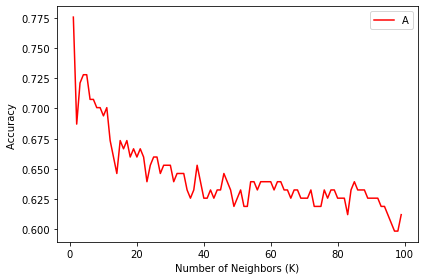

In [55]:
plt.plot(range(1,Ks),mean_acc,'r')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

<h1>4 - DecisionTreeClassifier</h1>

In [56]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
DecisionTreeClassifier_acc=dt_model.score(X_test,y_test)
DecisionTreeClassifier_acc

0.8639455782312925

In [58]:
predictions_dt=dt_model.predict(X_test)
print(classification_report(y_test,predictions_dt))
DecisionTreeClassifier_cm=confusion_matrix(y_test,predictions_dt)
DecisionTreeClassifier_cm

              precision    recall  f1-score   support

      active       0.86      0.86      0.86        73
    inactive       0.86      0.86      0.86        74

    accuracy                           0.86       147
   macro avg       0.86      0.86      0.86       147
weighted avg       0.86      0.86      0.86       147



array([[63, 10],
       [10, 64]], dtype=int64)

In [59]:
DecisionTreeClassifier_array = precision_recall_fscore_support(y_test,predictions_dt,average='macro')
DecisionTreeClassifier_array

(0.8639392817475009, 0.8639392817475009, 0.8639392817475009, None)

<h1>5 - SVM </h1>

<h3>5.1 - SVM.SVC </h3>

<h3>SVM kernel = rbf </h3>

In [60]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf', C =100000, gamma = 0.00001)
svm_model.fit(X_train,y_train)

svm_rbf_acc=svm_model.score(X_test, y_test)
svm_rbf_acc

0.9251700680272109

In [61]:
predictions_svm =svm_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_svm))
svm_rbf_cm=confusion_matrix(y_test,predictions_svm)
svm_rbf_cm

              precision    recall  f1-score   support

      active       0.93      0.92      0.92        73
    inactive       0.92      0.93      0.93        74

    accuracy                           0.93       147
   macro avg       0.93      0.93      0.93       147
weighted avg       0.93      0.93      0.93       147



array([[67,  6],
       [ 5, 69]], dtype=int64)

In [62]:
svm_rbf_array = precision_recall_fscore_support(y_test,predictions_svm,average='macro')
svm_rbf_array

(0.9252777777777779, 0.9251203258052574, 0.9251562138393891, None)

<h3>5.2 - SVM.NuSVC </h3>

In [63]:
from sklearn.svm import NuSVC
Nusvc_model=svm.NuSVC(  gamma="auto")
Nusvc_model.fit(X_train, y_train)

NuSVC(gamma='auto')

In [64]:
svm_NuSVC_acc=Nusvc_model.score(X_test, y_test)
svm_NuSVC_acc
# without parametre 71.42 
# with gama auto 75.51



0.7551020408163265

In [65]:
predictions_Nusvc=Nusvc_model.predict(X_test)
print(classification_report(y_test,predictions_Nusvc))
svm_NuSVC_cm=confusion_matrix(y_test,predictions_Nusvc)
svm_NuSVC_cm

              precision    recall  f1-score   support

      active       0.95      0.53      0.68        73
    inactive       0.68      0.97      0.80        74

    accuracy                           0.76       147
   macro avg       0.82      0.75      0.74       147
weighted avg       0.81      0.76      0.74       147



array([[39, 34],
       [ 2, 72]], dtype=int64)

In [66]:
svm_NuSVC_array = precision_recall_fscore_support(y_test,predictions_Nusvc,average='macro')
svm_NuSVC_array

(0.8152323976069948, 0.7536097741577195, 0.7421052631578947, None)

<h1> 6 - BaggingClassifier </h1>

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
    n_estimators=10000, 
    max_samples=0.8,
   )
bag_model.fit(X_train, y_train)
BaggingClassifier_acc = bag_model.score(X_test,y_test)
BaggingClassifier_acc

0.9115646258503401

In [68]:
predictions_bag=bag_model.predict(X_test)
print(classification_report(y_test,predictions_bag))
BaggingClassifier_cm=confusion_matrix(y_test,predictions_bag)
BaggingClassifier_cm

              precision    recall  f1-score   support

      active       0.91      0.92      0.91        73
    inactive       0.92      0.91      0.91        74

    accuracy                           0.91       147
   macro avg       0.91      0.91      0.91       147
weighted avg       0.91      0.91      0.91       147



array([[67,  6],
       [ 7, 67]], dtype=int64)

In [69]:
BaggingClassifier_array = precision_recall_fscore_support(y_test,predictions_bag,average='macro')
BaggingClassifier_array

(0.9116068122917438, 0.9116068122917438, 0.9115646258503401, None)

<h1>7 - RandomForestClassifier</h1>

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=1000)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [71]:
RandomForestClassifier_acc=RF_model.score(X_test, y_test)
RandomForestClassifier_acc

0.9251700680272109

In [72]:
predictions_RF=RF_model.predict(X_test)
print(classification_report(y_test,predictions_RF))
RandomForestClassifier_cm=confusion_matrix(y_test,predictions_RF)
RandomForestClassifier_cm


              precision    recall  f1-score   support

      active       0.94      0.90      0.92        73
    inactive       0.91      0.95      0.93        74

    accuracy                           0.93       147
   macro avg       0.93      0.93      0.93       147
weighted avg       0.93      0.93      0.93       147



array([[66,  7],
       [ 4, 70]], dtype=int64)

In [73]:
RandomForestClassifier_array = precision_recall_fscore_support(y_test,predictions_RF,average='macro')
RandomForestClassifier_array

(0.9259740259740259, 0.9250277674935209, 0.925114620478859, None)

In [74]:
cm1=pd.DataFrame(data=RandomForestClassifier_cm,index=['active','inactive'],columns=['active','inactive'])
cm1

,active,inactive
active,66,7
inactive,4,70


<h1>8 - AdaBoostClassifier</h1>

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=60, random_state=0)
ada_model.fit(X_train,y_train)

AdaBoostClassifier_acc =ada_model.score(X_test,y_test)
AdaBoostClassifier_acc

0.9251700680272109

In [76]:
predict_ada=ada_model.predict(X_test)

print(classification_report(y_test,predict_ada))
AdaBoostClassifier_cm=confusion_matrix(y_test,predict_ada)
AdaBoostClassifier_cm

              precision    recall  f1-score   support

      active       0.93      0.92      0.92        73
    inactive       0.92      0.93      0.93        74

    accuracy                           0.93       147
   macro avg       0.93      0.93      0.93       147
weighted avg       0.93      0.93      0.93       147



array([[67,  6],
       [ 5, 69]], dtype=int64)

In [77]:
AdaBoostClassifier_array = precision_recall_fscore_support(y_test,predict_ada,average='macro')
AdaBoostClassifier_array

(0.9252777777777779, 0.9251203258052574, 0.9251562138393891, None)

In [78]:
data = {'algo':[ 'ComplementNB','MultinomialNB','BernoulliNB','GaussianNB','CategoricalNB','LogisticRegression',
                 'knn','DecisionTreeClassifier','svm.SVC_kernel=rbf','SVM.NuSVC','BaggingClassifier',
                 'RandomForestClassifier','AdaBoostClassifier'],
        
        
        'accurency':[ComplementNB_acc*100   , MultinomialNB_acc*100       , BernoulliNB_acc*100  ,  GaussianNB_acc*100 , 
                     CategoricalNB_acc*100  , LogisticRegression_acc*100  , knn_acc*100          ,  DecisionTreeClassifier_acc*100 , 
                     svm_rbf_acc*100        , svm_NuSVC_acc*100           , BaggingClassifier_acc*100  , 
                     RandomForestClassifier_acc*100 , AdaBoostClassifier_acc*100 ,
                    ]}



df_acc = pd.DataFrame(data=data)
df_acc

,algo,accurency
0,ComplementNB,54.421769
1,MultinomialNB,54.421769
2,BernoulliNB,56.462585
3,GaussianNB,63.265306
4,CategoricalNB,82.312925
5,LogisticRegression,75.510204
6,knn,77.551020
7,DecisionTreeClassifier,86.394558
8,svm.SVC_kernel=rbf,92.517007
9,SVM.NuSVC,75.510204


In [79]:
df_acc=df_acc.sort_values(by="accurency" )
df_acc

,algo,accurency
0,ComplementNB,54.421769
1,MultinomialNB,54.421769
2,BernoulliNB,56.462585
3,GaussianNB,63.265306
5,LogisticRegression,75.510204
9,SVM.NuSVC,75.510204
6,knn,77.551020
4,CategoricalNB,82.312925
7,DecisionTreeClassifier,86.394558
10,BaggingClassifier,91.156463


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ComplementNB'),
  Text(1, 0, 'MultinomialNB'),
  Text(2, 0, 'BernoulliNB'),
  Text(3, 0, 'GaussianNB'),
  Text(4, 0, 'LogisticRegression'),
  Text(5, 0, 'SVM.NuSVC'),
  Text(6, 0, 'knn'),
  Text(7, 0, 'CategoricalNB'),
  Text(8, 0, 'DecisionTreeClassifier'),
  Text(9, 0, 'BaggingClassifier'),
  Text(10, 0, 'svm.SVC_kernel=rbf'),
  Text(11, 0, 'RandomForestClassifier'),
  Text(12, 0, 'AdaBoostClassifier')])

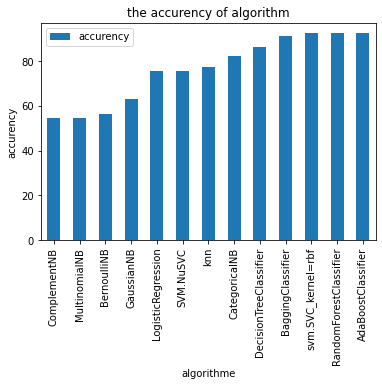

In [80]:
df_acc.plot(x="algo" ,kind='bar')
 
# labels for x & y axis
plt.xlabel('algorithme')
plt.ylabel('accurency')
 
# title of plot
plt.title('the accurency of algorithm')
plt.xticks(rotation=90)

In [81]:
ar_diagrame =  {
           'algo'          : [ 'ComplementNB','MultinomialNB','BernoulliNB','GaussianNB','CategoricalNB','LogisticRegression',
                               'knn','DecisionTreeClassifier','svm.SVC_kernel=rbf','SVM.NuSVC','BaggingClassifier',
                               'RandomForestClassifier','AdaBoostClassifier'],
        
        
           'accurency'     : [ComplementNB_acc*100   , MultinomialNB_acc*100       , BernoulliNB_acc*100  ,  GaussianNB_acc*100 , 
                              CategoricalNB_acc*100  , LogisticRegression_acc*100  , knn_acc*100          ,  DecisionTreeClassifier_acc*100 , 
                              svm_rbf_acc*100        , svm_NuSVC_acc*100           , BaggingClassifier_acc*100  , 
                              RandomForestClassifier_acc*100 , AdaBoostClassifier_acc*100  ],
    
    
            'percision'     : [ ComplementNB_array[0]*100  ,  MultinomialNB_array[0]*100          , BernoulliNB_array[0]*100 ,
                                GaussianNB_array[0]*100    ,  CategoricalNB_array[0]*100          , LogisticRegression_array[0]*100 , 
                                knn_array[0]*100           ,  DecisionTreeClassifier_array[0]*100 , svm_rbf_array[0]*100 ,
                                svm_NuSVC_array[0]*100     ,  BaggingClassifier_array[0]*100      , RandomForestClassifier_array[0]*100 ,
                                AdaBoostClassifier_array[0]*100  ],
    
            'recall'         : [ ComplementNB_array[1]*100  ,  MultinomialNB_array[1]*100          , BernoulliNB_array[1]*100 ,
                                GaussianNB_array[1]*100    ,  CategoricalNB_array[1]*100          , LogisticRegression_array[1]*100 , 
                                knn_array[1]*100           ,  DecisionTreeClassifier_array[1]*100 , svm_rbf_array[1]*100 ,
                                svm_NuSVC_array[1]*100     ,  BaggingClassifier_array[1]*100      , RandomForestClassifier_array[1]*100 ,
                                AdaBoostClassifier_array[1]*100  ],
    
            'f1_score'       : [ComplementNB_array[2]*100  ,  MultinomialNB_array[2]*100          , BernoulliNB_array[2]*100 ,
                                GaussianNB_array[2]*100    ,  CategoricalNB_array[2]*100          , LogisticRegression_array[2]*100 , 
                                knn_array[2]*100           ,  DecisionTreeClassifier_array[2]*100 , svm_rbf_array[2]*100 ,
                                svm_NuSVC_array[2]*100     ,  BaggingClassifier_array[2]*100      , RandomForestClassifier_array[2]*100 ,
                                AdaBoostClassifier_array[2]*100  ],
    
    
            'true_positif'   : [ ComplementNB_cm[0,0]  ,  MultinomialNB_cm[0,0]         , BernoulliNB_cm[0,0] ,
                                 GaussianNB_cm[0,0]    ,  CategoricalNB_cm[0,0]         , LogisticRegression_cm[0,0] , 
                                 knn_cm[0,0]          ,  DecisionTreeClassifier_cm[0,0] , svm_rbf_cm[0,0] ,
                                 svm_NuSVC_cm[0,0]     ,  BaggingClassifier_cm[0,0]      , RandomForestClassifier_cm[0,0] ,
                                 AdaBoostClassifier_cm[0,0]   ],
    
            'false_negatif'   : [ ComplementNB_cm[0,1]     ,  MultinomialNB_cm[0,1]          , BernoulliNB_cm[0,1] ,
                                 GaussianNB_cm[0,1]        ,  CategoricalNB_cm[0,1]          , LogisticRegression_cm[0,1] , 
                                 knn_cm[0,1]               ,  DecisionTreeClassifier_cm[0,1] , svm_rbf_cm[0,1] ,
                                 svm_NuSVC_cm[0,1]         ,  BaggingClassifier_cm[0,1]      , RandomForestClassifier_cm[0,1] ,
                                 AdaBoostClassifier_cm[0,1]    ],
    
    
            'false_positif'   : [ ComplementNB_cm[1,0]      ,  MultinomialNB_cm[1,0]           , BernoulliNB_cm[1,0] ,
                                 GaussianNB_cm[1,0]         ,  CategoricalNB_cm[1,0]           , LogisticRegression_cm[1,0] , 
                                 knn_cm[1,0]                ,  DecisionTreeClassifier_cm[1,0]  , svm_rbf_cm[1,0] ,
                                 svm_NuSVC_cm[1,0]          ,  BaggingClassifier_cm[1,0]       , RandomForestClassifier_cm[1,0] ,
                                 AdaBoostClassifier_cm[1,0]   ],
                                 
                                 
            'true_negatif'   : [ ComplementNB_cm[1,1]      ,  MultinomialNB_cm[1,1]          , BernoulliNB_cm[1,1] ,
                                 GaussianNB_cm[1,1]        ,  CategoricalNB_cm[1,1]          , LogisticRegression_cm[1,1] , 
                                 knn_cm[1,1]               ,  DecisionTreeClassifier_cm[1,1] , svm_rbf_cm[1,1] ,
                                 svm_NuSVC_cm[1,1]         ,  BaggingClassifier_cm[1,1]      , RandomForestClassifier_cm[1,1] ,
                                 AdaBoostClassifier_cm[1,1]     ]
    
         
          }
diag_all_ar= pd.DataFrame(ar_diagrame)
diag_all_ar

,algo,accurency,percision,recall,f1_score,true_positif,false_negatif,false_positif,true_negatif
0,ComplementNB,54.421769,67.012032,54.711218,44.559527,71,2,65,9
1,MultinomialNB,54.421769,67.012032,54.711218,44.559527,71,2,65,9
2,BernoulliNB,56.462585,72.500000,56.747501,47.406082,72,1,63,11
3,GaussianNB,63.265306,64.896907,63.374676,62.343454,58,15,39,35
4,CategoricalNB,82.312925,82.687991,82.349130,82.272727,64,9,17,57
5,LogisticRegression,75.510204,75.816135,75.472047,75.418060,51,22,14,60
6,knn,77.551020,77.675585,77.573121,77.534386,59,14,19,55
7,DecisionTreeClassifier,86.394558,86.393928,86.393928,86.393928,63,10,10,64
8,svm.SVC_kernel=rbf,92.517007,92.527778,92.512033,92.515621,67,6,5,69
9,SVM.NuSVC,75.510204,81.523240,75.360977,74.210526,39,34,2,72


In [82]:
#diag_all_ar.to_csv("result.csv" ,index=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ComplementNB'),
  Text(1, 0, 'MultinomialNB'),
  Text(2, 0, 'BernoulliNB'),
  Text(3, 0, 'GaussianNB'),
  Text(4, 0, 'CategoricalNB'),
  Text(5, 0, 'LogisticRegression'),
  Text(6, 0, 'knn'),
  Text(7, 0, 'DecisionTreeClassifier'),
  Text(8, 0, 'svm.SVC_kernel=rbf'),
  Text(9, 0, 'SVM.NuSVC'),
  Text(10, 0, 'BaggingClassifier'),
  Text(11, 0, 'RandomForestClassifier'),
  Text(12, 0, 'AdaBoostClassifier')])

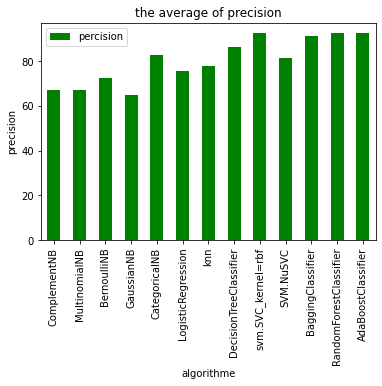

In [83]:
diag_all_ar.plot(x="algo",y="percision" ,kind='bar',color="green")
 
# labels for x & y axis
plt.xlabel('algorithme')
plt.ylabel('precision')
 

# title of plot
plt.title('the average of precision')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ComplementNB'),
  Text(1, 0, 'MultinomialNB'),
  Text(2, 0, 'BernoulliNB'),
  Text(3, 0, 'GaussianNB'),
  Text(4, 0, 'CategoricalNB'),
  Text(5, 0, 'LogisticRegression'),
  Text(6, 0, 'knn'),
  Text(7, 0, 'DecisionTreeClassifier'),
  Text(8, 0, 'svm.SVC_kernel=rbf'),
  Text(9, 0, 'SVM.NuSVC'),
  Text(10, 0, 'BaggingClassifier'),
  Text(11, 0, 'RandomForestClassifier'),
  Text(12, 0, 'AdaBoostClassifier')])

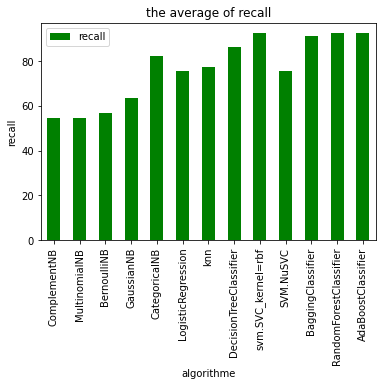

In [84]:
diag_all_ar.plot(x="algo",y="recall" ,kind='bar',color="green")
 
# labels for x & y axis
plt.xlabel('algorithme')
plt.ylabel('recall')
 

# title of plot
plt.title('the average of recall')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'ComplementNB'),
  Text(1, 0, 'MultinomialNB'),
  Text(2, 0, 'BernoulliNB'),
  Text(3, 0, 'GaussianNB'),
  Text(4, 0, 'CategoricalNB'),
  Text(5, 0, 'LogisticRegression'),
  Text(6, 0, 'knn'),
  Text(7, 0, 'DecisionTreeClassifier'),
  Text(8, 0, 'svm.SVC_kernel=rbf'),
  Text(9, 0, 'SVM.NuSVC'),
  Text(10, 0, 'BaggingClassifier'),
  Text(11, 0, 'RandomForestClassifier'),
  Text(12, 0, 'AdaBoostClassifier')])

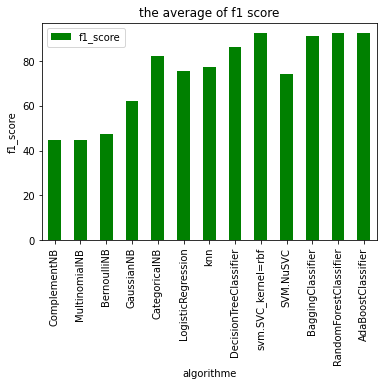

In [85]:
diag_all_ar.plot(x="algo",y="f1_score" ,kind='bar',color="green")
 
# labels for x & y axis
plt.xlabel('algorithme')
plt.ylabel('f1_score')
 

# title of plot
plt.title('the average of f1 score')
plt.xticks(rotation=90)